In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:

# from zipfile import ZipFile
# file_name = 'archive.zip'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done..")

## Libraries

In [3]:
import cv2
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

## Preprocessing(Training Data)

In [4]:
d = os.path.join("../../Training_Data(80)/train")
classes = ['Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

In [5]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 1448
Images of label "Metal":	 1485
Images of label "Paper":	 1491
Images of label "Plastic":	 1421
Images of label "Trash":	 1766


In [6]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [7]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [8]:
x_train=np.array(X)
y_train=np.array(Y)
print(x_train.shape,y_train.shape)

(7611, 224, 224, 3) (7611,)


## Preprocessing(Testing Data)

In [9]:
d = os.path.join("../../Training_Data(80)/val")

In [10]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 371
Images of label "Metal":	 371
Images of label "Paper":	 373
Images of label "Plastic":	 357
Images of label "Trash":	 441


In [11]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [12]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [13]:
x_test=np.array(X)
y_test=np.array(Y)
print(x_test.shape,y_test.shape)

(1913, 224, 224, 3) (1913,)


In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7611, 224, 224, 3) (7611,)
(1913, 224, 224, 3) (1913,)


## Build Model

In [15]:
model_resNet50V2=tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [16]:
model_resNet50V2.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [17]:
base_input2=model_resNet50V2.layers[0].input
base_output2=model_resNet50V2.layers[-2].output

final_output2 = layers.Dense(240)(base_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(128)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(64)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(5, activation='softmax')(final_output2)

In [18]:
new_model_resNet50V2 = tf.keras.Model(inputs = base_input2, outputs = final_output2)

In [19]:
new_model_resNet50V2.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

## Train Model

In [20]:
result=new_model_resNet50V2.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
238/238 [==============================] - 532s 2s/step - loss: 0.7188 - accuracy: 0.7422 - val_loss: 0.4972 - val_accuracy: 0.8317
Epoch 2/20
238/238 [==============================] - 533s 2s/step - loss: 0.2060 - accuracy: 0.9326 - val_loss: 0.4095 - val_accuracy: 0.8704
Epoch 3/20
238/238 [==============================] - 533s 2s/step - loss: 0.0866 - accuracy: 0.9733 - val_loss: 0.4001 - val_accuracy: 0.8745
Epoch 4/20
238/238 [==============================] - 536s 2s/step - loss: 0.0419 - accuracy: 0.9887 - val_loss: 0.2906 - val_accuracy: 0.9232
Epoch 5/20
238/238 [==============================] - 535s 2s/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.2674 - val_accuracy: 0.9242
Epoch 6/20
238/238 [==============================] - 534s 2s/step - loss: 0.0207 - accuracy: 0.9946 - val_loss: 0.2003 - val_accuracy: 0.9462
Epoch 7/20
238/238 [==============================] - 534s 2s/step - loss: 0.0132 - accuracy: 0.9967 - val_loss: 0.2525 - val_accuracy: 0.9347

## Accuracy

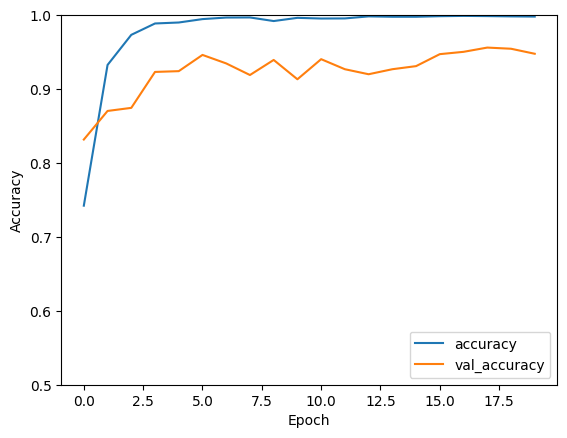

In [21]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

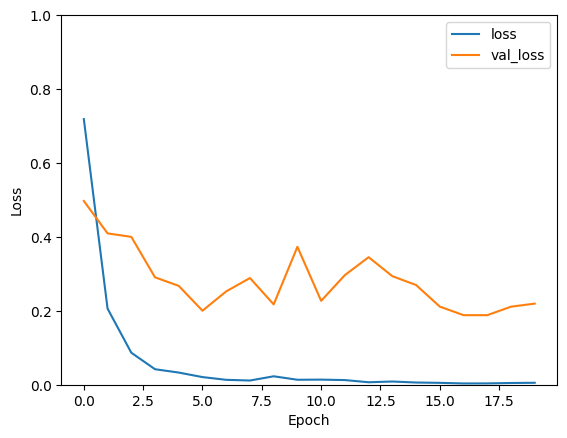

In [22]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

In [23]:
loss , accuracy = new_model_resNet50V2.evaluate(x_test,y_test)

60/60 [==============================] - 28s 465ms/step - loss: 0.2195 - accuracy: 0.9477


In [24]:
y_pred = new_model_resNet50V2.predict(x_test).round(2)

60/60 [==============================] - 28s 451ms/step


[[354   7   1   4   5]
 [  6 346  10   5   4]
 [  0   1 364   1   7]
 [ 10   5   3 333   6]
 [  3   2  17   4 415]]


<Axes: >

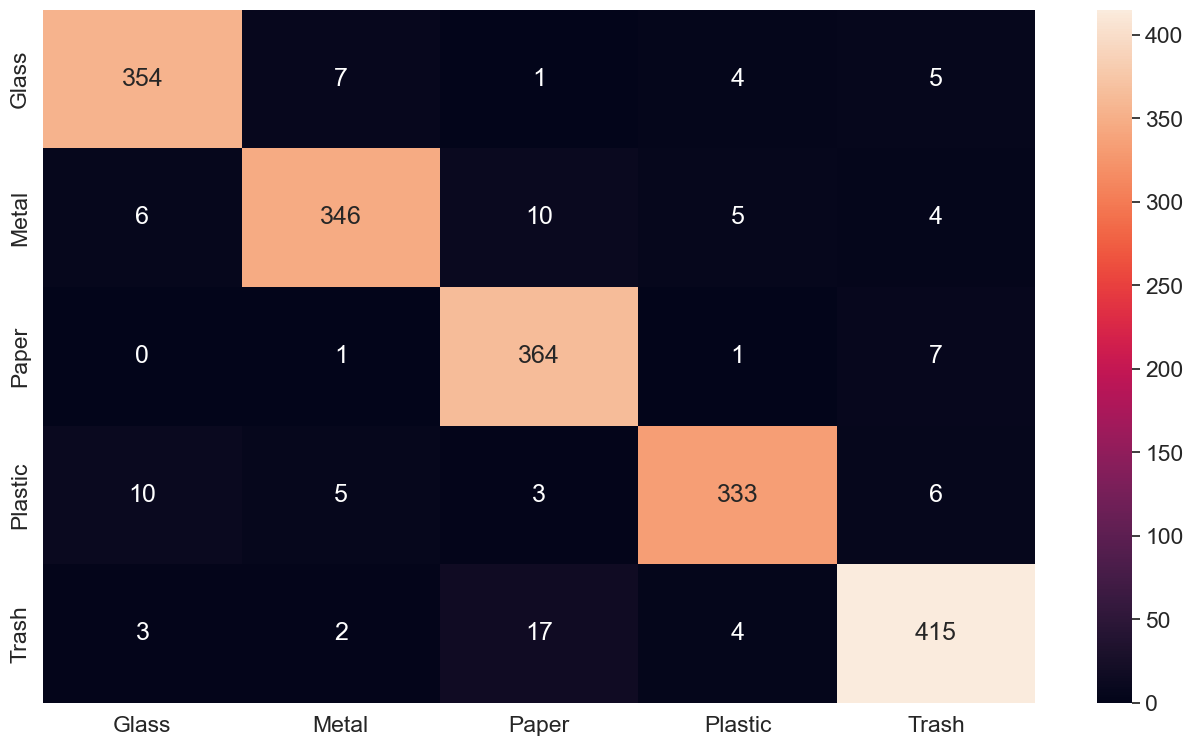

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

In [26]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=classes)
print(cr)

              precision    recall  f1-score   support

       Glass       0.95      0.95      0.95       371
       Metal       0.96      0.93      0.95       371
       Paper       0.92      0.98      0.95       373
     Plastic       0.96      0.93      0.95       357
       Trash       0.95      0.94      0.95       441

    accuracy                           0.95      1913
   macro avg       0.95      0.95      0.95      1913
weighted avg       0.95      0.95      0.95      1913



# Save The Model

In [27]:
# serialize model to JSON
model_json = new_model_resNet50V2.to_json()
with open("ResNet_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model_resNet50V2.save_weights("ResNet_model.h5")

## Saving Model In Drive

In [28]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [29]:
# !ls "/content/gdrive/My Drive"

In [30]:
# model_json = new_model_resNet50V2.to_json()
# with open("/content/gdrive/My Drive/Colab Notebooks/ResNet2_model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# new_model_resNet50V2.save_weights("/content/gdrive/My Drive/Colab Notebooks/ResNet2_model.h5")

In [31]:
# !ls "/content/gdrive/My Drive/Colab Notebooks"